In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

met_df = pd.read_csv('kelp_data/metadata.csv')
not_kelp = met_df[~(met_df['type'] == 'kelp')]

In [2]:
traindf = pd.read_csv('kelp_data/train.csv')
testdf = pd.read_csv('kelp_data/test.csv')

In [3]:
fname_tr = traindf.iloc[0]['filename_sat']

In [4]:
imds = rasterio.open(f"kelp_data/train_satellite/{fname_tr}")

/home/ziggy/pkgman/miniconda3/envs/ml-playground/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


- compare performance with:
    - cloud band, dem, invalid segments

In [5]:
land_mask = (imds.read(7) > 0)*3
cloud_mask = (imds.read(6)*2)
error_mask = (imds.read(5) == -32_768)

In [10]:
np.array([0,1])&np.array([1,0])

array([0, 0])

In [20]:
import matplotlib.pyplot as plt

In [33]:
from rasterio.plot import show

In [53]:
# compute intersection amongst all the cloud bands and labels
mysums = []
from tqdm import tqdm
for i, row in tqdm(traindf.iterrows()):
    sat_file = rasterio.open('kelp_data/train_satellite/'+row['filename_sat'])
    kelp_file = rasterio.open('kelp_data/train_kelp/'+row['filename_kelp'])
    land = sat_file.read(7).astype(np.uint8) > 0
    label = np.ascontiguousarray(kelp_file.read(1).astype(np.uint8)) == 1
    mysum = (label & land).sum()
    if mysum:
        mysums.append(mysum)
    # if mysum > 100:
    #     print("Sat file:")
    #     show(sat_file)
    #     print("Kelp file:")
    #     show(kelp_file)
    #     print("Cloud file:")
    #     show(sat_file.read(6))


0it [00:00, ?it/s]/home/ziggy/pkgman/miniconda3/envs/ml-playground/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
5635it [01:39, 56.90it/s]


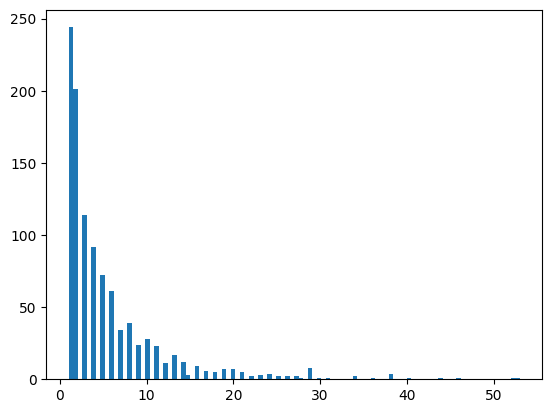

In [58]:
_ = plt.hist(mysums, bins=100)